Structure Factor
=============

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown
import wlcstat.util.wlc_vertex as vertex
import importlib

Evaluate the residues over a range of k values

In [2]:
num_k = 100
k_val_0 = 1e-4
k_val_f = 1e6
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=0
dimensions = 3
num_poles = 25

num_poles = min(num_poles, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))
residues = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,False,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]
        residues[i_k_val, i_pole] = resi_k_val[0, 0, i_pole]

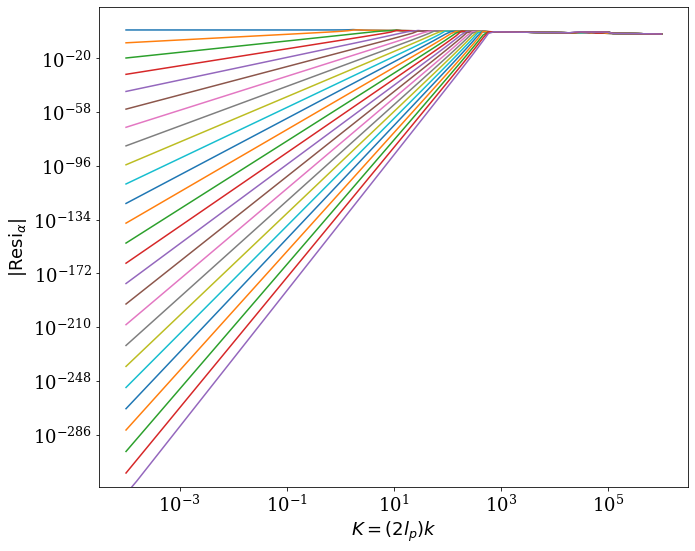

In [3]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.loglog(k_val, np.real(abs(residues[:, i_pole])))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'$| \mathrm{Resi}_{\alpha} |$')
plt.tight_layout()
plt.show()

Evaluation of the double pole at p=0

In [4]:
num_k = 100
k_val_0 = 1e-3
k_val_f = 1e4
k_val_vec = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

alpha_max = 25
residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))
ddp_residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))


for i_k in range(num_k):
    k_val=k_val_vec[i_k]
    residue_zero_full, ddp_residue_zero_full = vertex.eval_residue_zero(
        k_val, 0, lam_zero_only=False, lam_max=25, dimensions=3, lam_cont_frac_max=500)
    residue_zero[i_k,:], ddp_residue_zero[i_k,:] = residue_zero_full[0,:], ddp_residue_zero_full[0,:]


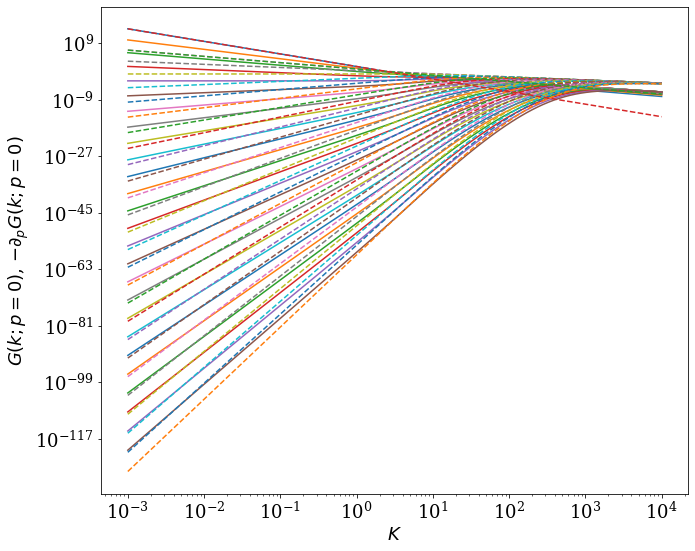

In [5]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k_val_vec, np.abs(ddp_residue_zero),'-')
plt.plot(k_val_vec, np.abs(residue_zero),'--')

a1 = np.sqrt(1 / 3)
plt.plot(k_val_vec, 2 / a1 ** 2 * k_val_vec ** -2,'--')
plt.plot(k_val_vec, 4 / a1 ** 4 * k_val_vec ** -4,'--')

 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'$G(k;p=0)$, $-\partial_{p} G(k;p=0)$')
#plt.ylim((2, 3.5))
#plt.xlim((2, 20))
plt.tight_layout()
plt.show()

Evaluation of the continued fraction for a k_value at a separate set of poles

In [98]:
importlib.reload(vertex)

num_k = 200
k_val_0 = 1e-3
k_val_f = 1e4
k_val_vec = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

alpha_max=25
residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))

for i_k in range(num_k):
    k1_mag = k_val_vec[i_k]
    k2_mag = 1.01 * k1_mag

    poles, residues = wlcgreen.eval_poles_and_residues(k1_mag, 0, False)
    residues_other_pole_k12 = vertex.eval_residues_other_pole(k2_mag, 0, poles, lam_zero_only=True, 
                                                              lam_max=alpha_max, alpha_max=alpha_max,
                                                              dimensions=3, lam_cont_frac_max=50)
    residue_zero[i_k, :] = residues_other_pole_k12

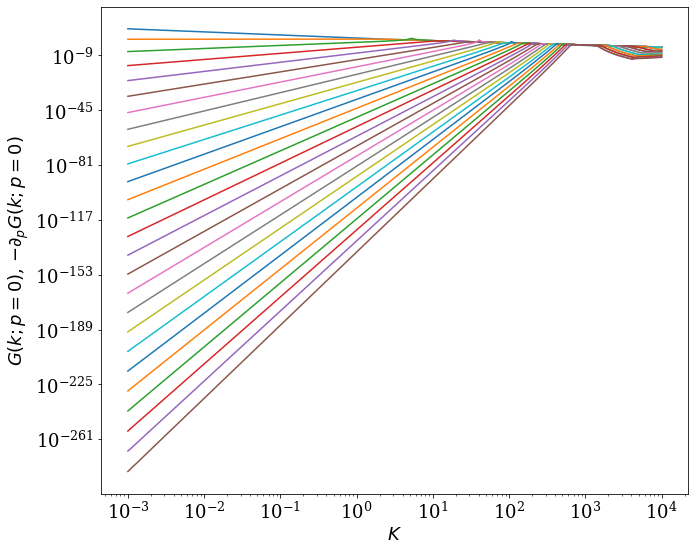

In [99]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k_val_vec, np.abs(residue_zero),'-')
#plt.plot(k_val_vec, k_val_vec ** -1,'--')
#a1 = np.sqrt(1 / 3)
#plt.plot(k_val_vec, 2 / a1 ** 2 * k_val_vec ** -2,'--')
#plt.plot(k_val_vec, 4 / a1 ** 4 * k_val_vec ** -4,'--')

 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'$G(k;p=0)$, $-\partial_{p} G(k;p=0)$')
#plt.ylim((2, 3.5))
#plt.xlim((2, 20))
plt.tight_layout()
plt.show()

Calculate the 2-point structure factor $S_{2}$

In [112]:
importlib.reload(wlcstruc)

num_k = 100
k_val_0 = 1e-3
k_val_f = 1e4
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

length_kuhn_vec = np.array([0.01, 0.1, 1, 10])
dimensions = 3

s2 = wlcstruc.s2_wlc(k_val, length_kuhn_vec, dimensions, alpha_max = 25)

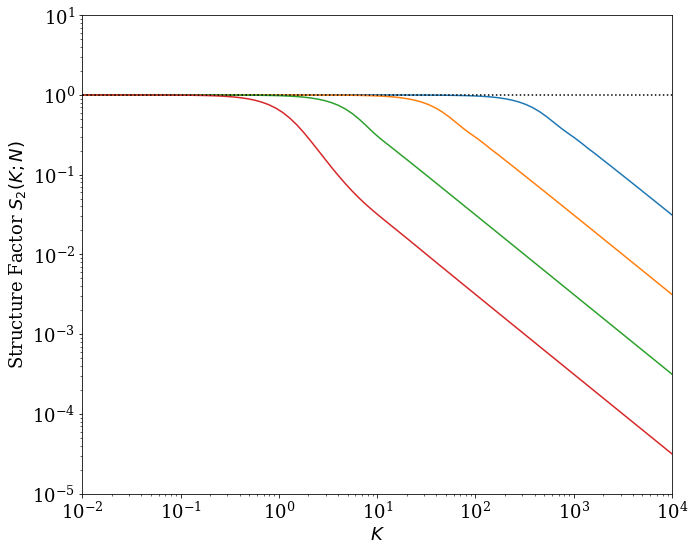

In [113]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for ind_length in range(0, len(length_kuhn_vec)):
    plt.plot(k_val, np.real(s2[:, ind_length]),'-')
    
plt.plot(k_val, 0 * k_val + 1,'k:')    
 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.ylim((1e-5, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

Calculate the 3-point structure factor $S_{3}$

In [131]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 100
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100])
dimensions = 3

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k1_vec[:, 0] += np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
theta = 0. * np.pi
k2_vec[:, 0] += np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
k2_vec[:, 1] += 1.01 * np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))

s3 = wlcstruc.s3_wlc(k1_vec, k2_vec, length_kuhn_vec, dimensions, alpha_max = 25)
s2_1 = wlcstruc.s2_wlc(k1_val, length_kuhn_vec, dimensions, alpha_max = 25)
s2_2 = wlcstruc.s2_wlc(k2_val, length_kuhn_vec, dimensions, alpha_max = 25)

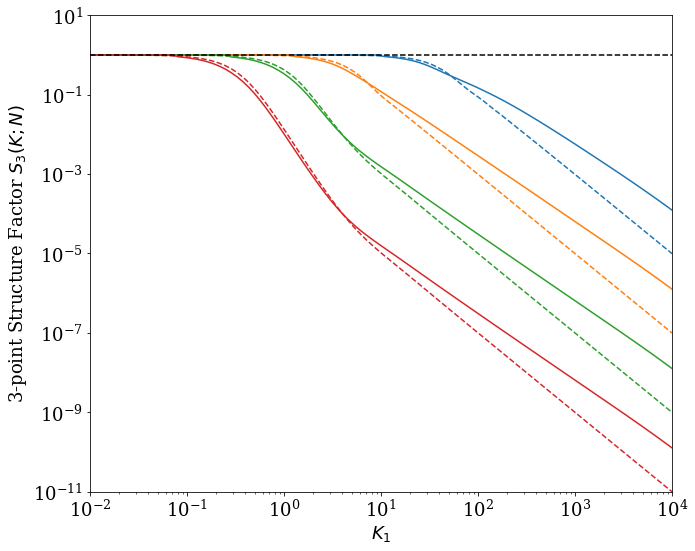

In [132]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}

plt.rc('font', **font)


for i_length in range(len(length_kuhn_vec)):
    plt.plot(k1_vec[:, 0], np.abs(s3[:,i_length]),'-', color = 'C' + str(i_length))
    plt.plot(k1_vec[:, 0], np.abs(s2_1[:,i_length] * s2_2[:,i_length]),'--', color = 'C' + str(i_length))
    
#plt.plot(k1_vec[:, 0], np.real(s3_save),'-')
#plt.plot(k1_vec[:, 0], k1_vec[:, 0] ** -2, '-')
 
plt.plot(k1_vec[:, 0], 0 * k1_vec[:, 0] + 1,'k--')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel(r'$K_{1}$')
plt.ylabel(r'3-point Structure Factor $S_{3}(K;N)$')
plt.ylim((1e-11, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

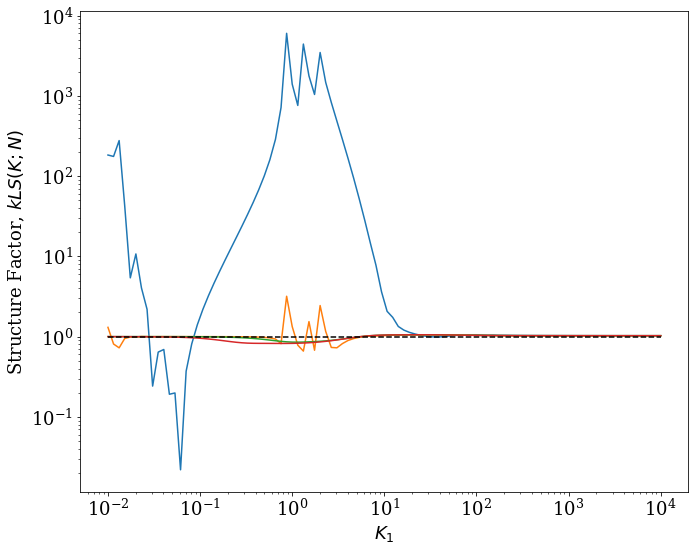

In [86]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 100
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100])
dimensions = 3

num_theta = 10
theta_0 = 0
theta_f = np.pi
theta_vec = np.linspace(theta_0, theta_f, num_theta)


k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k1_vec[:, 0] += np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
#k2_vec[:, 0] += 0 / np.sqrt(1) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
k2_vec[:, 0] += - np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))

s3 = wlcstruc.s3_wlc(k1_vec, k2_vec, length_kuhn_vec, dimensions, alpha_max = 25)
s2_1 = wlcstruc.s2_wlc(k1_val, length_kuhn_vec, dimensions, alpha_max = 25)
s2_2 = wlcstruc.s2_wlc(k2_val, length_kuhn_vec, dimensions, alpha_max = 25)

In [80]:
i_length = 3
np.abs(s3[:,i_length]) / np.abs(s2_1[:,i_length] * s2_2[:,i_length])

array([1.00127709, 1.00156409, 1.00187227, 1.00218069, 1.00246368,
       1.00269938, 1.00287817, 1.00300354, 1.0030849 , 1.00313069,
       1.00314629, 1.00313443, 1.00309583, 1.00302977, 1.00293453,
       1.00280802, 1.00264852, 1.00245571, 1.00223177, 1.00198246,
       1.00171771, 1.00145123, 1.00119873, 1.00097495, 1.00079002,
       1.00064621, 1.00053648, 1.00044534, 1.00035188, 1.00023357,
       1.00006851, 0.99983505, 0.99950911, 0.99906067, 0.99845044,
       0.99762732, 0.99652688, 0.99507117, 0.9931704 , 0.99072704,
       0.98764373, 0.98383629, 0.97925219, 0.97389231, 0.96783112,
       0.96122763, 0.95431988, 0.94740007, 0.94077466, 0.93472068,
       0.92945052, 0.9250931 , 0.92169193, 0.91921504, 0.91757098,
       0.91662626, 0.91622301, 0.91619653, 0.91639222, 0.91668021,
       0.91696541, 0.91719099, 0.91733525, 0.91740309, 0.91741467,
       0.91739435, 0.9173625 , 0.91733163, 0.9173066 , 0.91728734,
       0.91727191, 0.91725853, 0.91724627, 0.91723482, 0.91722

In [85]:
k2_vec

array([[1.00000000e-02, 1.00000000e-02, 0.00000000e+00],
       [1.14975700e-02, 1.14975700e-02, 0.00000000e+00],
       [1.32194115e-02, 1.32194115e-02, 0.00000000e+00],
       [1.51991108e-02, 1.51991108e-02, 0.00000000e+00],
       [1.74752840e-02, 1.74752840e-02, 0.00000000e+00],
       [2.00923300e-02, 2.00923300e-02, 0.00000000e+00],
       [2.31012970e-02, 2.31012970e-02, 0.00000000e+00],
       [2.65608778e-02, 2.65608778e-02, 0.00000000e+00],
       [3.05385551e-02, 3.05385551e-02, 0.00000000e+00],
       [3.51119173e-02, 3.51119173e-02, 0.00000000e+00],
       [4.03701726e-02, 4.03701726e-02, 0.00000000e+00],
       [4.64158883e-02, 4.64158883e-02, 0.00000000e+00],
       [5.33669923e-02, 5.33669923e-02, 0.00000000e+00],
       [6.13590727e-02, 6.13590727e-02, 0.00000000e+00],
       [7.05480231e-02, 7.05480231e-02, 0.00000000e+00],
       [8.11130831e-02, 8.11130831e-02, 0.00000000e+00],
       [9.32603347e-02, 9.32603347e-02, 0.00000000e+00],
       [1.07226722e-01, 1.07226

In [49]:
min(4, 2, 3)

2